In [13]:
import pandas as pd 
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import matplotlib.pyplot as plt
from sklearn import metrics
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg"

### Resumé des Test sur les models

,Model,F1_score,Set,Best_params
4,ran_for,0.768395,train,"[{'max_depth': 9, 'min_samples_leaf': 4, 'min_..."
20,xgboost,0.767788,train,"[{'max_depth': 4, 'min_child_weight': 3.5, 'n_..."
16,stacking,0.765916,train,"[svc, tree, svm]"
22,xgboost2,0.765254,train,"[{'colsample_bytree': 0.5932617287877644, 'gam..."
0,log_reg,0.764979,train,"[{'C': 10.0, 'penalty': 'l2'}]"
18,log_reg2,0.764028,train,"[{'C': 1.027, 'penalty': 'l2'}]"
14,voting,0.763713,train,"[svc, tree, svm, voting='soft']"
2,dec_tree,0.762534,train,"[{'max_depth': 8, 'min_samples_leaf': 5, 'min_..."
24,voting2,0.762437,train,"[xgb, svc, random_forest]"
10,ran_for2,0.760938,train,"[{'max_depth': 8, 'min_samples_leaf': 5, 'min_..."


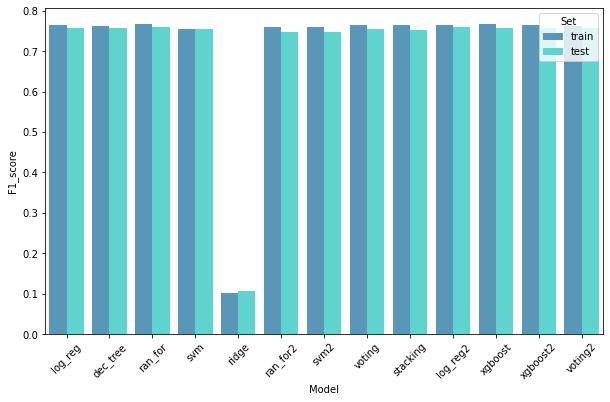

In [32]:
scores = pd.DataFrame(columns=['Model', 'F1_score', 'Set', 'Best_params'])

scores = scores.append({'Model' : 'log_reg', 'F1_score' : 0.7649788178333669, 'Set' : 'train', 'Best_params' : [{'C': 10.0, 'penalty': 'l2'}]}, ignore_index = True)
scores = scores.append({'Model' : 'log_reg', 'F1_score' : 0.7568513119533526, 'Set' : 'test', 'Best_params' : [{'C': 10.0, 'penalty': 'l2'}]}, ignore_index = True)
scores = scores.append({'Model' : 'dec_tree', 'F1_score' : 0.7625342145670606, 'Set' : 'train', 'Best_params' : [{'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 2}]}, ignore_index = True)
scores = scores.append({'Model' : 'dec_tree', 'F1_score' : 0.7579068430132261, 'Set' : 'test', 'Best_params' : [{'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 2}]}, ignore_index = True)
scores = scores.append({'Model' : 'ran_for', 'F1_score' : 0.7683945920239147, 'Set' : 'train', 'Best_params' : [{'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 55}]}, ignore_index = True)
scores = scores.append({'Model' : 'ran_for', 'F1_score' : 0.7591836734693876, 'Set' : 'test', 'Best_params' : [{'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 55}]}, ignore_index = True)
scores = scores.append({'Model' : 'svm', 'F1_score' : 0.7557546519641626, 'Set' : 'train', 'Best_params' : [{'C': 50, 'gamma': 0.0005}]}, ignore_index = True)
scores = scores.append({'Model' : 'svm', 'F1_score' : 0.7544483985765125, 'Set' : 'test', 'Best_params' : [{'C': 50, 'gamma': 0.0005}]}, ignore_index = True)
scores = scores.append({'Model' : 'ridge', 'F1_score' : 0.1013622719926114, 'Set' : 'train', 'Best_params' : [{'alpha': 0.01}]}, ignore_index = True)
scores = scores.append({'Model' : 'ridge', 'F1_score' : 0.10682492581602374, 'Set' : 'test', 'Best_params' : [{'alpha': 0.01}]}, ignore_index = True)
scores = scores.append({'Model' : 'ran_for2', 'F1_score' : 0.7609381429159238, 'Set' : 'train', 'Best_params' : [{'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 4,'n_estimators': 60}]}, ignore_index = True)
scores = scores.append({'Model' : 'ran_for2', 'F1_score' : 0.7468879668049793, 'Set' : 'test', 'Best_params' : [{'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 4,'n_estimators': 60}]}, ignore_index = True)
scores = scores.append({'Model' : 'svm2', 'F1_score' : 0.7609381429159238, 'Set' : 'train', 'Best_params' : [{'C': 48, 'gamma': 0.0005}]}, ignore_index = True)
scores = scores.append({'Model' : 'svm2', 'F1_score' : 0.7468879668049793, 'Set' : 'test', 'Best_params' : [{'C': 48, 'gamma': 0.0005}]}, ignore_index = True)
scores = scores.append({'Model' : 'voting', 'F1_score' : 0.7637127940877348, 'Set' : 'train', 'Best_params' : ["svc", "tree", "svm", "voting='soft'"]}, ignore_index = True)
scores = scores.append({'Model' : 'voting', 'F1_score' : 0.7545401288810779, 'Set' : 'test', 'Best_params' : ["svc", "tree", "svm", "voting='soft'"]}, ignore_index = True)
scores = scores.append({'Model' : 'stacking', 'F1_score' : 0.76591576401953214, 'Set' : 'train', 'Best_params' : ["svc", "tree", "svm"]}, ignore_index = True)
scores = scores.append({'Model' : 'stacking', 'F1_score' : 0.75268473185546243, 'Set' : 'test', 'Best_params' : ["svc", "tree", "svm"]}, ignore_index = True)
scores = scores.append({'Model' : 'log_reg2', 'F1_score' : 0.7640283915896611, 'Set' : 'train', 'Best_params' : [{'C': 1.027, 'penalty': 'l2'}]}, ignore_index = True)
scores = scores.append({'Model' : 'log_reg2', 'F1_score' : 0.7595396729254997, 'Set' : 'test', 'Best_params' : [{'C': 1.027, 'penalty': 'l2'}]}, ignore_index = True)
scores = scores.append({'Model' : 'xgboost', 'F1_score' : 0.7677882697167177, 'Set' : 'train', 'Best_params' : [{'max_depth': 4, 'min_child_weight': 3.5, 'n_estimators': 20}]}, ignore_index = True)
scores = scores.append({'Model' : 'xgboost', 'F1_score' : 0.7568862275449102, 'Set' : 'test', 'Best_params' : [{'max_depth': 4, 'min_child_weight': 3.5, 'n_estimators': 20}]}, ignore_index = True)
scores = scores.append({'Model' : 'xgboost2', 'F1_score' : 0.7652544630961896, 'Set' : 'train', 'Best_params' : [{'colsample_bytree': 0.5932617287877644, 'gamma': 1.3650137578892094, 'max_depth': 6.0, 'min_child_weight': 3.0, 'reg_alpha': 51.0, 'reg_lambda': 0.8217358660799771}]}, ignore_index = True)
scores = scores.append({'Model' : 'xgboost2', 'F1_score' : 0.7570485902819436, 'Set' : 'test', 'Best_params' : [{'colsample_bytree': 0.5932617287877644, 'gamma': 1.3650137578892094, 'max_depth': 6.0, 'min_child_weight': 3.0, 'reg_alpha': 51.0, 'reg_lambda': 0.8217358660799771}]}, ignore_index = True)
scores = scores.append({'Model' : 'voting2', 'F1_score' : 0.7624368899360484, 'Set' : 'train', 'Best_params' : ["xgb", "svc", "random_forest"]}, ignore_index = True)
scores = scores.append({'Model' : 'voting2', 'F1_score' : 0.7577413479052825, 'Set' : 'test', 'Best_params' : ["xgb", "svc", "random_forest"]}, ignore_index = True)

display(scores.sort_values(by='F1_score',ascending=False))
plt.figure(figsize=(10,6))
sns.barplot(data=scores, x='Model', y='F1_score', hue='Set', palette=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"])
plt.xticks(rotation=45);